# SK Learn Practice

# Sample Work Flow

## Intialization

In [1]:
# import libraries

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import data

hd = pd.read_csv('heart-disease.csv')

# view dataframe

hd.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create X (Features Matrix)
x = hd.drop('target', axis = 1)

# Create y (Labels)
y = hd['target']

In [3]:
# We will be using a classification model
# A random forest model would work well as a classification model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
clf.fit(x_train, y_train);

In [6]:
# Make a Prediction
y_preds = clf.predict(x_test)

# Display
y_preds

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [7]:
# Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [8]:
clf.score(x_test, y_test)

0.7213114754098361

In [9]:
# View other performance metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        30
           1       0.71      0.77      0.74        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [10]:
print(confusion_matrix(y_test, y_preds))

[[20 10]
 [ 7 24]]


In [11]:
print(accuracy_score(y_test, y_preds))

0.7213114754098361


## Improve the model

In [12]:
# Use different number of estimators

np.random.seed(44)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:2f}%")
    print("")

Trying model with 10 estimators
Model accuracy on test set: 75.409836%

Trying model with 20 estimators
Model accuracy on test set: 73.770492%

Trying model with 30 estimators
Model accuracy on test set: 70.491803%

Trying model with 40 estimators
Model accuracy on test set: 72.131148%

Trying model with 50 estimators
Model accuracy on test set: 77.049180%

Trying model with 60 estimators
Model accuracy on test set: 75.409836%

Trying model with 70 estimators
Model accuracy on test set: 78.688525%

Trying model with 80 estimators
Model accuracy on test set: 75.409836%

Trying model with 90 estimators
Model accuracy on test set: 75.409836%



In [13]:
# Save the model and load it
import pickle

In [14]:
pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [15]:
# We can now import the above model
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(x_test,y_test)

0.7540983606557377

# Getting Data ready for machine learning

1. Filling or disregarding null values
2. Split data into features and labels
3. Converting categorical values to numerical values

In [16]:
hd.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [17]:
X = hd.drop('target', axis = 1)

In [18]:
y = hd['target']

In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Preparing Data

### 1.1 Make sure it is all numerical

In [20]:
car_sales = pd.read_csv('car-sales-extended.csv')

In [21]:
car_sales.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [24]:
X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

In [25]:
# Convert Columns to numeric data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create list of categorical features
cat_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 cat_features)],
                               remainder='passthrough')

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [4]:
# Split into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size=0.2)

# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

NameError: name 'transformed_X' is not defined

## Dealing With Missing Values

1. Imputation = Fill with some value
2. Remove samples with missing data

In [27]:
missing_data = pd.read_csv('car-sales-extended-missing-data.csv')

In [28]:
missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
# Create X and Y
x = missing_data.drop('Price', axis = 1)

y = missing_data['Price']

### Fill missing data with pandas

In [30]:
# Make
missing_data['Make'].fillna('missing', inplace = True)

# Colour
missing_data['Colour'].fillna('missing', inplace = True)

# Odometer
missing_data['Odometer (KM)'].fillna(missing_data['Odometer (KM)'].mean(), inplace = True)

# Doors
missing_data['Doors'].fillna(4, inplace = True)

In [31]:
# Check DF
missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [32]:
# Remove rows with missing price values
missing_data.dropna(inplace=True)

In [33]:
# Convert categorical data to numbers
# Convert Columns to numeric data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create list of categorical features
cat_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 cat_features)],
                               remainder='passthrough')

transformed_X = transformer.fit_transform(missing_data)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Fill Missing Data With SciKit Learn

In [34]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [35]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [37]:
# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y= car_sales_missing['Price']

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [38]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [40]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with the mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define Columns
car_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features),
])

# Fill train and test values seperately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X
filled_X_train

array([['Honda', 'White', 4.0, 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 4.0, 162665.0],
       ['Honda', 'White', 4.0, 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 4.0, 196225.0],
       ['Honda', 'Blue', 'missing', 4.0, 133117.0],
       ['Honda', 'missing', 'missing', 4.0, 150582.0]], dtype=object)

In [41]:
# Get transformed array back into a data frame
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                      columns=['Make', 'Colour', 'Doors', 'Odometer (KM)', 'Price'])

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                      columns=['Make', 'Colour', 'Doors', 'Odometer (KM)', 'Price'])

# Check missin in training data
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
Price            0
dtype: int64

In [51]:
car_sales_filled_train = car_sales_filled_train.astype('str')

In [50]:
car_sales_filled_test = car_sales_filled_test.astype('str')

In [52]:
# One Hot Encode the features
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')

# Fill train and test seperately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check x_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 1.50582e+05]])

# Choose the right model

# Some things to note
* Sklearn refers to mlm, algorithms as estimators
* Classification - predicting a category 'clf'
* Regression - predicting a number 'reg'

## California Housing Set

In [2]:
# Get dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
housing_df = pd.DataFrame(housing["data"])

In [23]:
housing_df.head(3)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [24]:
df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [25]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [26]:
# Needs target
df["target"] = housing["target"]
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [27]:
df = df.drop("MedHouseValue", axis = 1)

KeyError: "['MedHouseValue'] not found in axis"

In [28]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Linear Model - Ridge

In [67]:
# Import Algo
from sklearn.linear_model import Ridge

# Create Var
X = df.drop('target', axis = 1)
y = df['target']

# Setup random seed
np.random.seed(42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model on training set
model = Ridge()
model.fit(X_train, y_train)

# Check Score - Returns R**2
model.score(X_test, y_test)

0.5758549611440126

## Ensemble Model - Random Forest

In [68]:
# Import Algorithm
from sklearn.ensemble import RandomForestRegressor

# Create Variables
X = df.drop('target', axis = 1)
y = df['target']

# Setup random seed
np.random.seed(42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model on training set
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Score
reg.score(X_test, y_test)

0.8065734772187598

## Classification - LinearSVC

In [78]:
# Create Data Frame
hd_df = pd.read_csv("heart-disease.csv")

# Import Algorithm
from sklearn.svm import LinearSVC

# Create Variables
X = hd_df.drop('target', axis = 1)
y = hd_df['target']

# Setup random seed
np.random.seed(42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model on training set
svc = LinearSVC()
svc.fit(X_train, y_train)

# Score
svc.score(X_test, y_test)

C:\Users\unbou\Desktop\Portfolio\Python\SKLearn_Practice\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\unbou\Desktop\Portfolio\Python\SKLearn_Practice\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

## Random Forest

In [3]:
# Create Data Frame
hd_df = pd.read_csv("heart-disease.csv")

# Import Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create Variables
X = hd_df.drop('target', axis = 1)
y = hd_df['target']

# Setup random seed
np.random.seed(42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model on training set (training)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

0.8524590163934426

# Making Predictions

In [4]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [5]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [6]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [7]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

**Predict with Regression**

In [9]:
from sklearn.ensemble import RandomForestRegressor

X = hd_df.drop("target", axis=1)
y = hd_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor()

reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.47535348583878

In [32]:
y_preds = reg.predict(X_test)

In [33]:
y_preds[:10]

array([2.8183601, 1.08166  , 2.4896707, 1.67161  , 3.8782008, 4.4253825,
       2.12413  , 3.4719108, 1.51475  , 1.26226  ])

In [ ]:
y_test[:]

# **Evaluate The Model**

Three ways to evaluate sklearn models:

    -estimator's score() method
    
    -the 'scoring' parameter
    
    -problem specific metric functions

In [4]:
# score() method

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd_df.drop("target", axis=1)
y = hd_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

Use `score()` on a regression model

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Get dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

# Needs target
df["target"] = housing["target"]

X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor(n_estimators=10)
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.7891658554270593

**The default score() evaluation metric is r_squared for regression algos**

Use the `scoring` parameter

In [6]:
from sklearn.model_selection import cross_val_score

# score() method

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd_df.drop("target", axis=1)
y = hd_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
clf.score(X_test, y_test)

0.8524590163934426

In [8]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [9]:
np.random.seed(42)

# take mean of cross val score
clf_cross_val = np.mean(cross_val_score(clf, X, y, cv=10))

In [10]:
clf_cross_val

0.8183870967741935

Scoring parameter set to none by default so that default evaluation metric is used for the model given in a cross validation

# Classification model evaluation metrics
1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification Report

### **Accuracy**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

hd_df = pd.read_csv("heart-disease.csv")

np.random.seed(42)

X = hd_df.drop("target", axis=1)
y = hd_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf_cross_val = cross_val_score(clf, X, y, cv=5)
clf_cross_val

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [6]:
print(f"Cross-validated accuracy: {(np.mean(clf_cross_val) * 100).round(2)}%")

Cross-validated accuracy: 81.16%


### **Area Under the Reciever Operating Characteristic Curve (AUC/ROC)**

ROC Curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.02, 0.98],
       [0.8 , 0.2 ],
       [0.06, 0.94],
       [0.21, 0.79],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.86, 0.14],
       [0.36, 0.64],
       [0.03, 0.97],
       [0.98, 0.02]])

In [13]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.98, 0.2 , 0.94, 0.79, 0.97, 0.97, 0.14, 0.64, 0.97, 0.02])

In [14]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check false positive rates
fpr

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.15625, 0.21875,
       0.28125, 0.375  , 0.4375 , 0.53125, 0.625  , 0.71875, 0.71875,
       0.90625, 0.9375 , 1.     ])

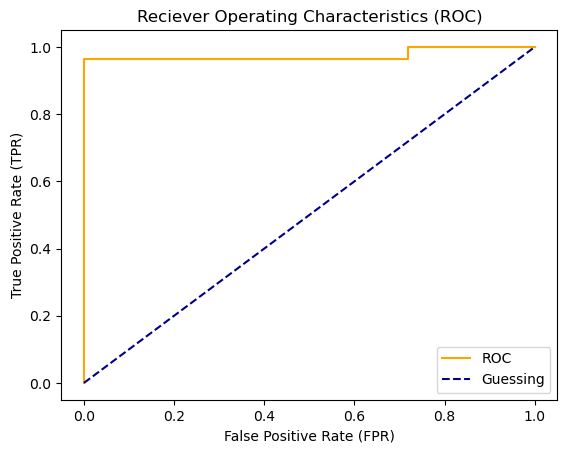

In [15]:
# Create a function for plotting ROC Curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC Curve given the false positve rate (fpr) and
    true postive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Reciever Operating Characteristics (ROC)")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9752155172413794

### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea where the model is getting confused.

In [27]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[32,  0],
       [ 1, 28]], dtype=int64)

In [18]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,32,0
1,1,28


### **Import library from Jupyter Notebook**

In [ ]:
import sys
!cconda install --yes --prefix {sys.prefix} seaborn

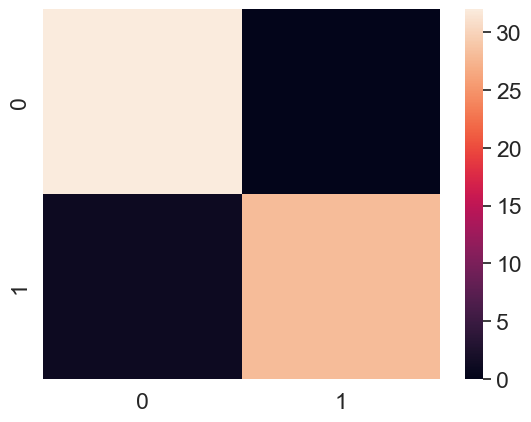

In [20]:
# Make confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set font scale 
sns.set(font_scale=1.5)

# Create confusion_matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Create heatmap
sns.heatmap(conf_mat);

### Creating a confusion matrix using SK Learn

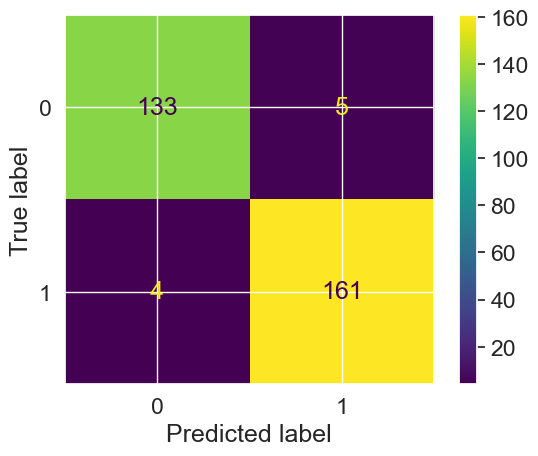

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

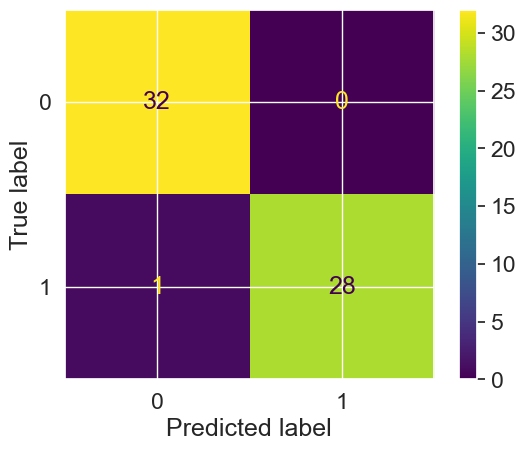

In [23]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

### Classification Report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        29

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



# Regression Model Evaluation Metrics

Basic Evaluation Metrics:

    -R^2 (r-squared) of coeffecient of determination
    -Mean Absolute error(MAE)
    -Mean Squared Error(MSE)

### R^2

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Get dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

# Needs target
df["target"] = housing["target"]

# Set variables
X = df.drop("target", axis = 1)
y = df["target"]

# Set random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor(n_estimators=10)
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.7869919586520553

In [10]:
from sklearn.metrics import r2_score

y_preds = reg.predict(X_test)

r2_score(y_true=y_test,
        y_pred=y_preds)

0.7869919586520553

The R² score, or coefficient of determination, measures how well a regression model fits a dataset. It ranges from 0 to 1, where 1 means perfect prediction and 0 means the model is no better than guessing the mean of the target variable. R² is calculated by comparing the variance explained by the model to the total variance of the target variable. A higher R² indicates a model that explains a larger proportion of the variance, suggesting better model performance. However, R² has limitations, such as potentially being misleading in non-linear models. It's important to use R² in conjunction with other metrics to fully evaluate a model's effectiveness.

### Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [12]:
from sklearn.metrics import mean_absolute_error

y_preds = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3459883100775194

Mean Absolute Error (MAE) is a metric used to measure the accuracy of a regression model. It calculates the average of the absolute differences between predicted values and actual values. MAE gives an idea of the magnitude of errors in prediction, without considering their direction. A lower MAE indicates a model with better predictive accuracy. It's particularly useful because it's easy to interpret and isn't sensitive to outliers. However, MAE alone may not fully capture the model's performance, especially in the presence of skewed error distributions.

### Mean Squared Error  (MSE)

In [13]:
from sklearn.metrics import mean_squared_error

y_preds = reg.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2791276498198556

# Scoring Parameter

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create Data Frame
heart_disease = pd.read_csv("heart-disease.csv")

# To get same values as tutorial
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [15]:
np.random.seed(42)

# Cross-val accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [18]:
print(f"The cross-validated accuracy is: {cv_acc.mean()*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [19]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [20]:
print(f"The cross-validated precision is: {cv_precision.mean()*100:.2f}%")

The cross-validated precision is: 80.86%


In [21]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [22]:
print(f"The cross-validated recall is: {cv_recall.mean()*100:.2f}%")

The cross-validated recall is: 84.24%


## This can be used for regression 

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Get dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

# Needs target
df["target"] = housing["target"]

# Set variables
X = df.drop("target", axis = 1)
y = df["target"]

# Set random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor(n_estimators=100)

In [25]:
cv_r2 = cross_val_score(reg, X, y, cv=2, scoring=None)
cv_r2

array([0.5978029 , 0.62970218])

In [26]:
print(f"The cross-validated R^2 is: {cv_r2.mean()*100:.2f}%")

The cross-validated R^2 is: 61.38%


# Metric Functions

In [4]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create Data Frame
heart_disease = pd.read_csv("heart-disease.csv")

# To get same values as tutorial
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)
# Evaluate metric functions
print("Classifier Metrics on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")

Classifier Metrics on Test Set:
Accuracy: 85.25%
Precision: 84.85%


# Improving MLM

First predictions/model = baseline model/preds

Imporvement Methods:

Data Side:

    Get more data
    Improve data
    
Model:
    
    Better algorithm?
    Could we improve current model

**Parameters**: found patterns in data found by mlm

**Hyperparameters**: settings on a model that can be adjusted for improvement

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Model instantiation
clf = RandomForestClassifier()

In [14]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust hyperparameters:

    1. By hand
    2. RandomSearchCV
    3. GridSearchCV

### By Hand

In [7]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Create Evaluation Function
def evaluate_preds(y_true, y_preds):
    """
    Performs an evaluation of a classification models predictions
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "f1": round(f1, 2),
                   "recall": round(recall, 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Sore: {f1:.2f}%")
    
    return metric_dict

In [5]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle Data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 Sore: 0.85%


{'accuracy': 0.82, 'precision': 0.81, 'f1': 0.85, 'recall': 0.88}

In [6]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=60)
clf_2.fit(X_train, y_train)

# Make Predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 Sore: 0.85%


In [7]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=60,
                               max_depth=10)
clf_3.fit(X_train, y_train)

# Make Predictions
y_preds_3 = clf_3.predict(X_valid)

# Evaluate classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 Sore: 0.85%


### Random Search CV

In [8]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf":[1, 2, 4]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #num of models to try
                           cv=5,
                           verbose=2)
# Fit the data
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_esti

In [9]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 5}

In [10]:
# Make predictions with best hyper parameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 80.33%
Precision: 0.75%
Recall: 0.86%
F1 Sore: 0.80%


### GridSearchCV
**Use best parameters to inform you grid search**

Grid search works through the entire range of parameters instead of random selection as in RandomSearch

In [5]:
# Grid Search
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

grid = {"n_estimators": [100, 200, 300],
        "max_depth": [None],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [4, 6],
        "min_samples_leaf":[2, 4]}

np.random.seed(42)

heart_disease = pd.read_csv("heart-disease.csv")

# Shuffle Data
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid,
                           cv=5,
                           verbose=2)
# Fit the data
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=None,

In [13]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [8]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.87%
Recall: 0.79%
F1 Sore: 0.83%


## Compare models

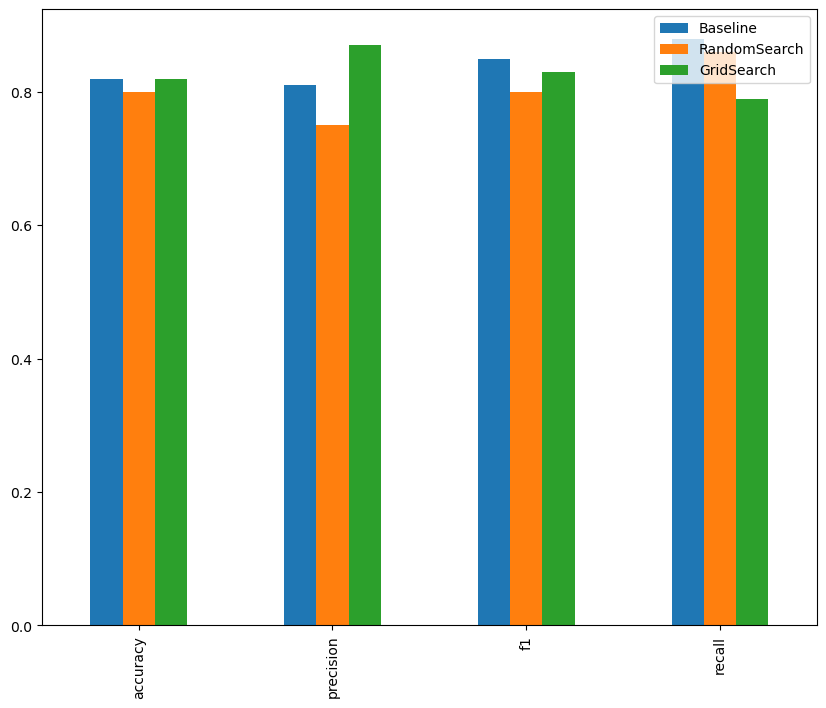

In [18]:
compare_metrics = pd.DataFrame({"Baseline": baseline_metrics,
                                "RandomSearch": rs_metrics,
                                "GridSearch": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

# Saving and Loading a Model

## **Pickle**

In [9]:
import pickle

# Save model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [12]:
# Load Model
loaded_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [14]:
# Make predictions with loaded model 
loaded_preds = loaded_model.predict(X_test)

# Evaluate loaded model
evaluate_preds(y_test, loaded_preds)

Acc: 81.97%
Precision: 0.87%
Recall: 0.79%
F1 Sore: 0.83%


{'accuracy': 0.82, 'precision': 0.87, 'f1': 0.83, 'recall': 0.79}

## Joblib

Joblib is better with large amounts of data

In [15]:
from joblib import dump, load

dump(gs_clf, filename="randomforest_model_2.joblib")

['randomforest_model_2.joblib']

In [16]:
loaded_model_jl = load(filename="randomforest_model_2.joblib")

In [17]:
# Make predictions with loaded model 
loaded_preds = loaded_model_jl.predict(X_test)

# Evaluate loaded model
evaluate_preds(y_test, loaded_preds)

Acc: 81.97%
Precision: 0.87%
Recall: 0.79%
F1 Sore: 0.83%


{'accuracy': 0.82, 'precision': 0.87, 'f1': 0.83, 'recall': 0.79}